# import libraries

In [44]:
# Handling Data
import pandas as pd
import numpy as np

# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For Text processing 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('stopwords')

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
# DL
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Sequential

#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Reading Data

In [45]:
df = pd.read_csv('spam_ham_dataset.csv')
# Removing Unnecessary column
df.drop('Unnamed: 0', axis=1, inplace = True)
# Changing column names
df.columns = ['label', 'text', 'class']

In [46]:
df.head()

,label,text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [47]:
df.shape

(5171, 3)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
 2   class   5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [49]:
# No NaN in the data
df.isna().sum()

label    0
text     0
class    0
dtype: int64

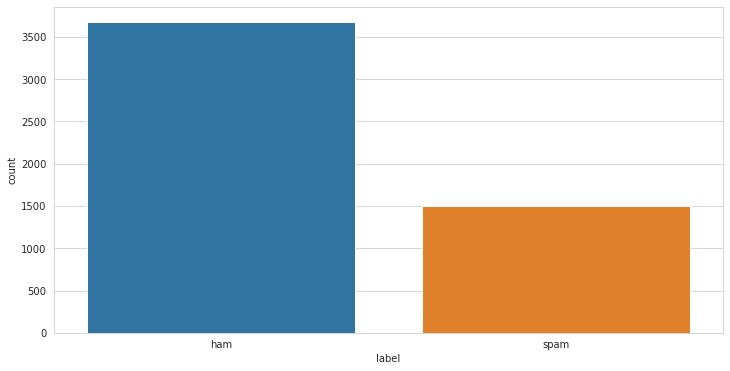

In [50]:
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'label');

In [51]:
#count vectorizer

## Viewing samples of the data

In [55]:
# few examples of the data

for i in df.iterrows():
    print("Class Label: {}\nMail: \n{}\n\n".format(i[1][0], i[1][1]))
    if i[0] == 6: break
   

Class Label: ham
Mail: 
Subject : enron methanol ; meter # : 988291 follow note gave monday , 4 / 3 / 00 { preliminary flow data provided daren } . please override pop ' daily volume { presently zero } reflect daily activity obtain gas control . change needed asap economics purposes .


Class Label: ham
Mail: 
Subject : hpl nom january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls


Class Label: ham
Mail: 
Subject : neon retreat ho ho ho , ' around wonderful time year - - - neon leaders retreat time ! know time year extremely hectic , ' tough think anything past holidays , life go past week december 25 january 1 , ' ' like think minute . calender handed beginning fall semester , retreat scheduled weekend january 5 - 6 . youth ministers conference brad dustin connected week , ' going change date following weekend , january 12 - 13 . comes part need think . think agree ' important us get together time recharge batteries get far spring semester , lot trouble difficult

## Remove stopwords from the data

In [53]:
%%time
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

CPU times: user 11 s, sys: 0 ns, total: 11 s
Wall time: 11 s


In [54]:
df.sample(10)

,label,text,class
2277,ham,Subject : feb 2000 intercompany accrual varian...,0
3865,ham,Subject : july nominations shell deer park - -...,0
2697,ham,Subject : jan . 01 sale texas general land off...,0
5005,ham,"Subject : point change deals oh yeah , goes de...",0
1056,ham,"Subject : : meter 9707 vance , find anything p...",0
4156,ham,Subject : meter 8740 dec 99 daren - set delive...,0
1595,ham,Subject : txu fuel co . nom . 2 / 21 / 01 - re...,0
4173,ham,Subject : valero ' february gas nominations da...,0
129,spam,Subject : ? r ? ? ? ? ? ? ? ? apaliourg @ iit ...,1
4011,spam,Subject : legacy power products . power outlet...,1


In [56]:
X = df.loc[:, 'text']
y = df.loc[:, 'class']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (5171,)
shape of y: (5171,)


## Split data into **train** and **test** in 80:20

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [58]:
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (4136,)
Test Data Shape: (1035,)


## Preprocess text to build the ML mdel

In [59]:
cVect = CountVectorizer()
cVect.fit(X_train)

CountVectorizer()

  Let's see the vocabulary that has extracted by hte count vextorizer

In [60]:
print('NO.of Tokens: ',len(cVect.vocabulary_.keys()))

NO.of Tokens:  44255


In [61]:
# document term vector (dtv)
dtv = cVect.transform(X_train)

In [62]:
type(dtv)

scipy.sparse._csr.csr_matrix

In [63]:
dtv = dtv.toarray()

In [64]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 4136
Tokens/Features: 44255


In [65]:
# Let's see an sample that has been preprocessed
dtv[1]

array([0, 0, 0, ..., 0, 0, 0])

### Logistic Regression.

##### **Logistic Regression** could help use predict whether the student passed or failed. Logistic regression predictions are discrete (only specific values or categories are allowed). We can also view probability scores underlying the model’s classifications.

### Hyperparameter Tuning

In [ ]:
lr = LogisticRegression(verbose=1)

grid={"C":[float(i) for i in range(1, 3)], "penalty":["l2"], "solver":[ 'lbfgs', 'liblinear']}
logreg_cv=GridSearchCV(lr, grid, cv=4)
logreg_cv.fit(dtv,y_train)

print("Tuned Hpyerparameters :",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        44256     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15014D+03    |proj g|=  4.26350D+03

At iterate   50    f=  1.10558D+02    |proj g|=  1.18483D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
44256     60     73      1     0     0   1.200D-02   1.106D+02
  F =   110.55739054391424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        44256     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15014D+03    |proj g|=  4.01050D+03

At iterate   50    f=  1.17550D+02    |proj g|=  1.54788D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
44256     51     58      1     0     0   5.131D-04   1.176D+02
  F =   117.55023100239040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        44256     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15014D+03    |proj g|=  4.52100D+03

At iterate   50    f=  1.11735D+02    |proj g|=  4.08588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
44256     55     58      1     0     0   3.565D-03   1.117D+02
  F =   111.73466627999926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        44256     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15014D+03    |proj g|=  3.94050D+03

At iterate   50    f=  1.16072D+02    |proj g|=  1.34644D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
44256     56     64      1     0     0   1.063D-03   1.161D+02
  F =   116.07234373067396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s finished


[LibLinear]iter  1 act 1.098e+03 pre 9.271e+02 delta 1.318e+00 f 2.150e+03 |g| 6.587e+03 CG   7
cg reaches trust region boundary
iter  2 act 4.386e+02 pre 3.428e+02 delta 1.907e+00 f 1.053e+03 |g| 2.128e+03 CG   8
cg reaches trust region boundary
iter  3 act 2.660e+02 pre 2.085e+02 delta 2.690e+00 f 6.140e+02 |g| 9.408e+02 CG   9
cg reaches trust region boundary
iter  4 act 1.490e+02 pre 1.195e+02 delta 3.631e+00 f 3.480e+02 |g| 4.542e+02 CG  12
iter  5 act 5.954e+01 pre 4.877e+01 delta 3.779e+00 f 1.990e+02 |g| 1.808e+02 CG  12
iter  6 act 1.604e+01 pre 1.345e+01 delta 3.779e+00 f 1.395e+02 |g| 7.476e+01 CG  11
iter  7 act 6.462e+00 pre 5.293e+00 delta 3.779e+00 f 1.235e+02 |g| 3.312e+01 CG  11
iter  8 act 3.042e+00 pre 2.351e+00 delta 3.779e+00 f 1.170e+02 |g| 1.661e+01 CG  11
iter  9 act 2.010e+00 pre 1.640e+00 delta 3.779e+00 f 1.140e+02 |g| 7.347e+00 CG  12
iter 10 act 7.777e-01 pre 6.540e-01 delta 3.779e+00 f 1.119e+02 |g| 3.601e+00 CG  11
iter 11 act 9.332e-02 pre 8.481e-02 delt

In [ ]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)

## Evaluate on the Test data

In [25]:
# Preprocess the test data
test_dtv = cVect.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 1035
Tokens/Features: 44255


In [26]:
%%time
pred = lr.predict(test_dtv)

CPU times: user 225 ms, sys: 174 ms, total: 399 ms
Wall time: 265 ms


In [27]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  98.35748792270532


  Classification Report of the classifier

In [28]:
# 0 - Not Spam / Ham
# 1 - Spam 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       744
           1       0.95      0.99      0.97       291

    accuracy                           0.98      1035
   macro avg       0.97      0.99      0.98      1035
weighted avg       0.98      0.98      0.98      1035



  Confusion Matrix

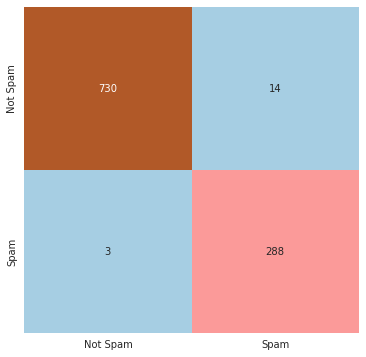

In [29]:
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

## Predict Class label for the unseen data i.e., Spam or Not Spam

In [1]:
# 'You won money in lottery. Click here to avail'
def predict_class(lr):
    text = input('Enter Text(Subject of the mail): ')
    text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
    t_dtv = cVect.transform(text).toarray()
    print('Predicted Class:', end = ' ')
    print('Spam' if lr.predict(t_dtv)[0] else 'Not Spam') 
    prob = lr.predict_proba(t_dtv)*100
    print(f"Not Spam: {prob[0][0]}%\nSpam: {prob[0][1]}%")
    plt.figure(figsize=(12, 6))
    sns.barplot(x =['Not Spam', 'Spam'] , y = [prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probalility')
    plt.show()


Enter Text(Subject of the mail): Celebration for Diwali
Predicted Class: Spam
Not Spam: 36.57041506170512%
Spam: 63.42958493829488%


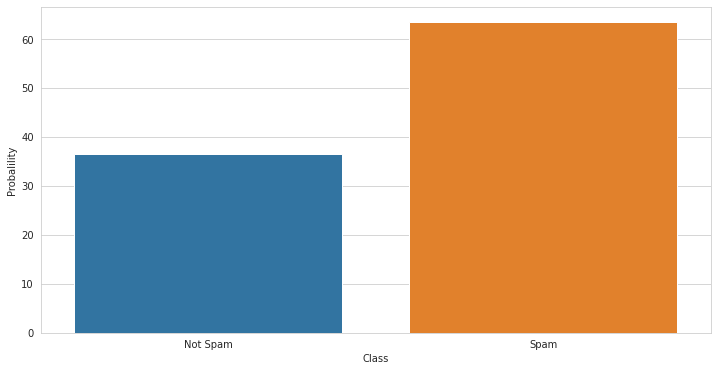

In [38]:
predict_class(lr)

In [55]:
print(df)

     label                                               text  class
0      ham  Subject : enron methanol ; meter # : 988291 fo...      0
1      ham  Subject : hpl nom january 9 , 2001 ( see attac...      0
2      ham  Subject : neon retreat ho ho ho , ' around won...      0
3     spam  Subject : photoshop , windows , office . cheap...      1
4      ham  Subject : : indian springs deal book teco pvr ...      0
...    ...                                                ...    ...
5166   ham  Subject : put 10 ft transport volumes decrease...      0
5167   ham  Subject : 3 / 4 / 2000 following noms hpl ' ta...      0
5168   ham  Subject : calpine daily gas nomination > > jul...      0
5169   ham  Subject : industrial worksheets august 2000 ac...      0
5170  spam  Subject : important online banking alert dear ...      1

[5171 rows x 3 columns]


# Description 
I have used Spam-Ham dataset to implement the assignment . From scikit-learn I have imported count-vectorizer to count the number of occurences of that word in the document .I have done preprocessing of dataset by removing the stopwords . Then I have splitted data in training and testing . Then I have build the model and fitted in X_train .Then performed transformations . For Hyper Tuning I have used Logistic Regression . After testing printed the accuracy score and classification report .

In [ ]:
# first time using count vectorizer 

In [36]:

txt = ['hello my name us yash', ' abhi is my brother ', 'this jupyter notebook', 'features of count vectorizer']


In [37]:
count_vect= CountVectorizer()

In [38]:
count_matrix = count_vect.fit_transform(txt)

In [39]:
count_array = count_matrix.toarray()

In [40]:
df =pd.DataFrame(data = count_array,columns = count_vect.get_feature_names_out())

In [41]:
print(df)

   abhi  brother  count  features  hello  is  jupyter  my  name  notebook  of  \
0     0        0      0         0      1   0        0   1     1         0   0   
1     1        1      0         0      0   1        0   1     0         0   0   
2     0        0      0         0      0   0        1   0     0         1   0   
3     0        0      1         1      0   0        0   0     0         0   1   

   this  us  vectorizer  yash  
0     0   1           0     1  
1     0   0           0     0  
2     1   0           0     0  
3     0   0           1     0  
